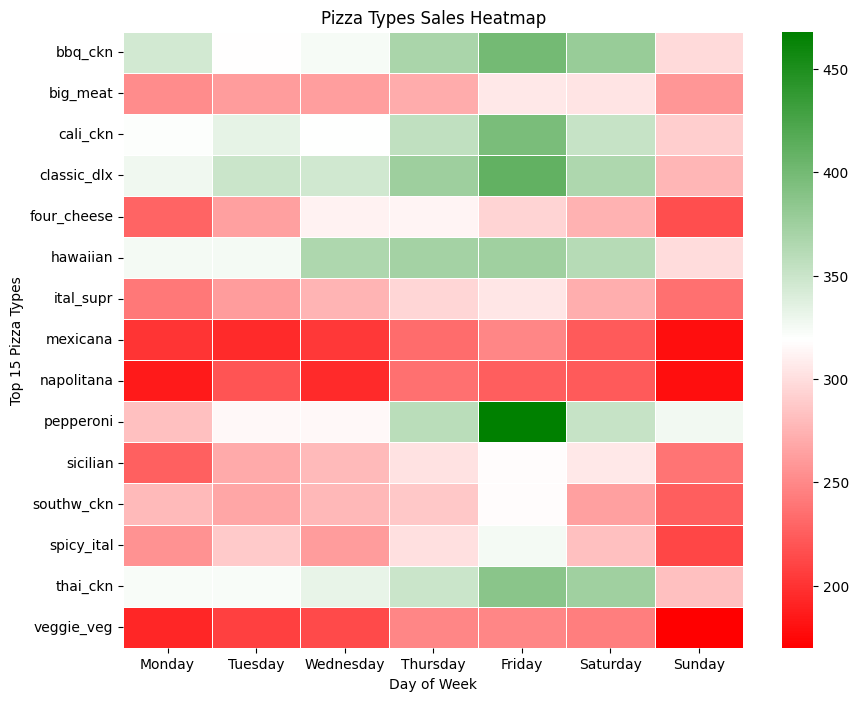

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sqlite3
from matplotlib.colors import LinearSegmentedColormap

df = pd.read_csv('Updated_SQL.csv')

df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()

grouped = df.groupby(['pizza_type_id', 'day_of_week'])['quantity'].sum().reset_index()

top_pizzas = grouped.groupby('pizza_type_id')['quantity'].sum().nlargest(15).index.tolist()

filtered_df = grouped[grouped['pizza_type_id'].isin(top_pizzas)]

pivot_df = filtered_df.pivot(index="pizza_type_id", columns="day_of_week", values="quantity")

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_df = pivot_df.reindex(days_order, axis=1)

plt.figure(figsize=(10,8))
sns.heatmap(pivot_df, cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"]), linewidths=.5)

plt.title('Pizza Types Sales Heatmap')
plt.xlabel('Day of Week')
plt.ylabel('Top 15 Pizza Types')
plt.show()

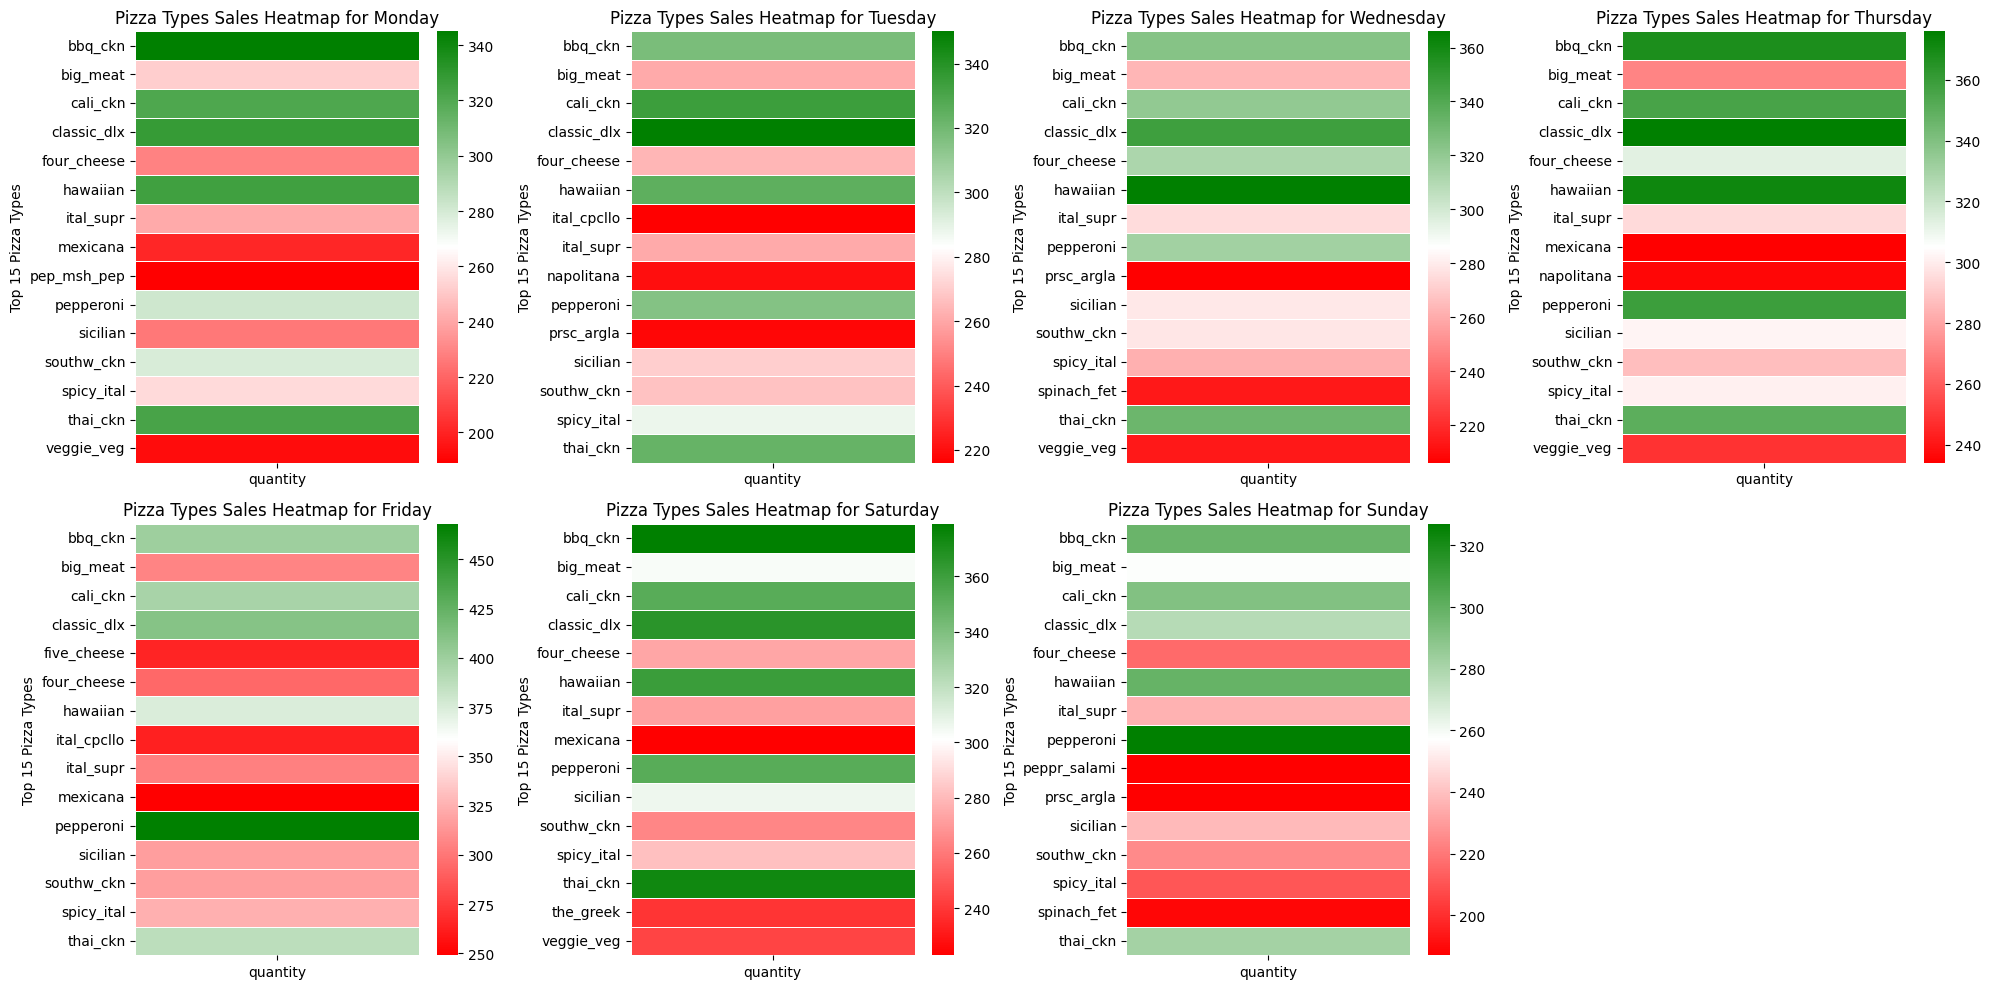

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sqlite3
from matplotlib.colors import LinearSegmentedColormap

df = pd.read_csv('Updated_SQL.csv')

df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(20,10))

for i, day in enumerate(days_order):
    day_df = df[df['day_of_week'] == day]
    grouped = day_df.groupby('pizza_type_id')['quantity'].sum().reset_index()
    top_pizzas = grouped.nlargest(15, 'quantity')['pizza_type_id'].tolist()
    filtered_df = grouped[grouped['pizza_type_id'].isin(top_pizzas)]
    pivot_df = filtered_df.set_index('pizza_type_id')['quantity']
    
    plt.subplot(2, 4, i+1)
    sns.heatmap(pivot_df.to_frame(), cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"]), linewidths=.5)
    plt.title(f'Pizza Types Sales Heatmap for {day}')
    plt.ylabel('Top 15 Pizza Types')

plt.tight_layout()
plt.show()


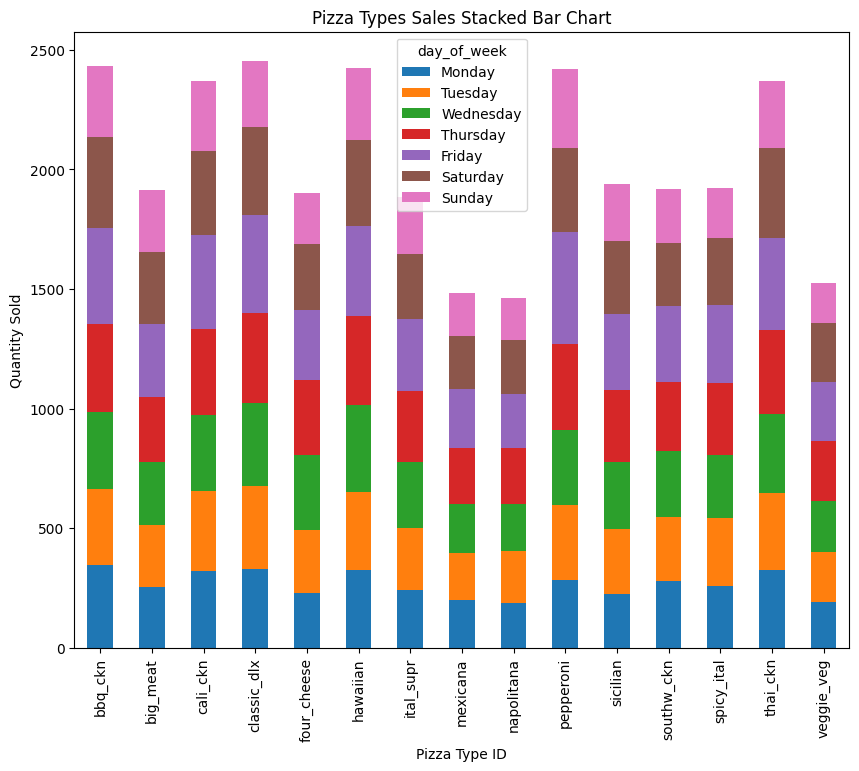

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Updated_SQL.csv')

df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()

grouped = df.groupby(['pizza_type_id', 'day_of_week'])['quantity'].sum().unstack().reset_index()
top_pizzas = grouped.set_index('pizza_type_id').sum(axis=1).nlargest(15).index.tolist()
filtered_df = grouped[grouped['pizza_type_id'].isin(top_pizzas)]
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
filtered_df = filtered_df.set_index('pizza_type_id').reindex(days_order, axis=1)
filtered_df.plot(kind='bar', stacked=True, figsize=(10,8))

plt.xlabel('Pizza Type ID')
plt.ylabel('Quantity Sold')
plt.title('Pizza Types Sales Stacked Bar Chart')


plt.show()
